In [ ]:
# !pip install seaborn
# !pip install factor_analyzer
!pip install statsmodels
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 29.8 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=1f8b4ffdfe9a2202816eba7e3db25d1066fee7345ebc713bf1378b2cfaeb6ef8
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, davies_bouldin_score

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
# from skfeature.function.similarity_based import fishers_score
warnings.filterwarnings('ignore')

import factor_analyzer
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from sklearn.cross_decomposition import CCA
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericitychi2

import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Importing Data and Data Preprocessing:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Multivariate Project: ICMR Cancer Data/Data/data.csv')
label = pd.read_csv('/content/drive/MyDrive/Multivariate Project: ICMR Cancer Data/Data/labels.csv')

In [ ]:
# labels = pd.read_csv(r"H:\Suilli Data\archive (1)\labels.csv")
label.head(10)

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
5,sample_5,PRAD
6,sample_6,KIRC
7,sample_7,PRAD
8,sample_8,BRCA
9,sample_9,PRAD


In [ ]:
label['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [ ]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
data.shape

In [ ]:
description=data.describe()
description.round(3)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000,801.000,801.000,801.000,801.000,801.0,801.000,801.000,801.000,801.000,...,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000
mean,0.027,3.011,3.095,6.722,9.814,0.0,7.406,0.500,0.017,0.013,...,5.897,8.766,10.056,4.848,9.742,11.742,10.155,9.591,5.528,0.095
std,0.137,1.201,1.066,0.639,0.507,0.0,1.108,0.509,0.134,0.205,...,0.746,0.603,0.379,2.383,0.534,0.670,0.581,0.564,2.074,0.365
min,0.000,0.000,0.000,5.009,8.436,0.0,3.931,0.000,0.000,0.000,...,2.854,6.678,8.669,0.000,7.975,9.045,7.530,7.865,0.594,0.000
25%,0.000,2.299,2.390,6.303,9.464,0.0,6.676,0.000,0.000,0.000,...,5.455,8.384,9.826,3.131,9.401,11.316,9.837,9.244,4.092,0.000
50%,0.000,3.144,3.127,6.656,9.792,0.0,7.450,0.443,0.000,0.000,...,5.973,8.784,10.066,5.445,9.785,11.750,10.191,9.567,5.219,0.000
75%,0.000,3.883,3.803,7.038,10.142,0.0,8.122,0.789,0.000,0.000,...,6.411,9.147,10.299,6.637,10.082,12.178,10.579,9.918,6.876,0.000
max,1.482,6.237,6.063,10.130,11.356,0.0,10.718,2.779,1.786,4.068,...,7.771,11.105,11.318,9.207,11.812,13.715,11.676,12.813,11.206,5.254


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
sum(data.isnull().sum()>0)

0

In [ ]:
sum(data.duplicated())

0

In [ ]:
object_columns = [col for col in data.columns if data[col].dtype == 'object']

print("Columns of type 'object':", object_columns)

Columns of type 'object': ['Unnamed: 0']


In [ ]:

data= data.drop(['Unnamed: 0'], axis =1 )

### Feature Selection:
#### 1. Correlation:

min value of Variance: 0.0
max value of Variance: 44.70796426808468
mean value of Variance: 1.7619354959615094


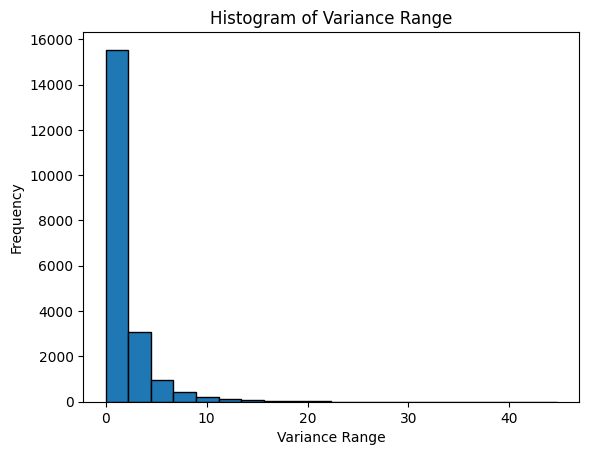

In [ ]:
print("min value of Variance:",min(np.var(data)))

print("max value of Variance:",max(np.var(data)))

print("mean value of Variance:",np.mean(np.var(data)))


# Calculate the variances
variances = np.var(data, axis=0)

# Calculate the range of variances
variance_range = variances.max() - variances.min()

# Create a histogram of variances
plt.hist(variances, bins=20, edgecolor='k', range=(variances.min(), variances.max()))

plt.xlabel('Variance Range')
plt.ylabel('Frequency')
plt.title('Histogram of Variance Range')
plt.show()

In [ ]:
mostvar= [ col for col in data.columns if variances[col] <=1.25]
print("no. of  columns with variance less than threshold:",len(mostvar))

no. of  columns with variance less than threshold: 12427


\##### Removing columns with less variance than Threshold = 0.2:

In [ ]:

# threshold = 0.2
threshold = 0.2

FilteredFeatures = [ col for col in data.columns if variances[col] <=0.2]

print("no. of  columns with variance less than threshold:",len(FilteredFeatures))

no. of  columns with variance less than threshold: 2161


## Dimension Reduction:
#### 1. PCA with 0.99 variance explainilibity:

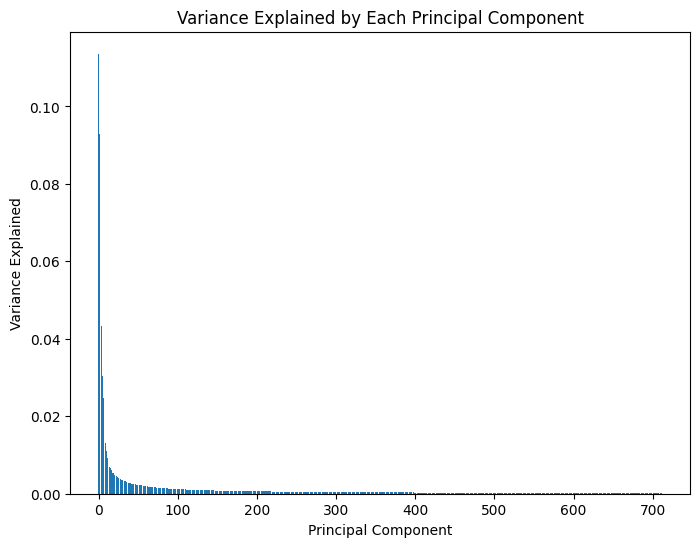

In [ ]:
scaler = StandardScaler()
# x_train, x_test  = train_test_split(data, test_size = 0.2)
# Load your gene expression data (replace this with your actual data)
# X should be a matrix where rows represent samples and columns represent genes
# Each element X[i, j] is the expression value of gene j in sample i
# Make sure the data is properly normalized before applying PCA
x_train_scaled = scaler.fit_transform(data.drop(FilteredFeatures, axis = 1))
# Apply PCA
# Apply PCA with a target explained variance of 95%
pca = PCA(n_components= 0.99)
X_pca_99 = pca.fit_transform(x_train_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot the variance explained by each component
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()

In [ ]:
eigenvalues = pca.explained_variance_
# Calculate proportion of variance explained by each component
variance_ratio = pca.explained_variance_ratio_
# Calculate cumulative variance explained
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Create a DataFrame to display the PCA results
pca_results = pd.DataFrame({
    'Principal Component': np.arange(1, len(eigenvalues) + 1),
    'Eigenvalue': eigenvalues,
    'Proportion of Variance Explained': variance_ratio,
    'Cumulative Variance Explained': cumulative_variance_ratio
})
pca_results.head(230).round(3)

,Principal Component,Eigenvalue,Proportion of Variance Explained,Cumulative Variance Explained
0,1,2089.461,0.114,0.114
1,2,1709.676,0.093,0.207
2,3,1547.955,0.084,0.291
3,4,1023.161,0.056,0.346
4,5,794.452,0.043,0.390
...,...,...,...,...
225,226,10.270,0.001,0.851
226,227,10.256,0.001,0.851
227,228,10.250,0.001,0.852
228,229,10.139,0.001,0.852


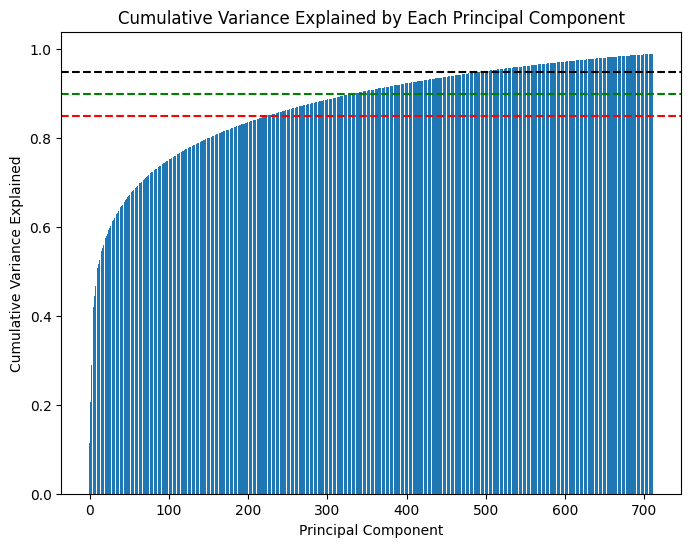

In [ ]:
CVE = np.cumsum(explained_variance)
# Plot the variance explained by each component
plt.figure(figsize=(8, 6))
plt.bar(range(len(CVE)), CVE)
plt.axhline(y=0.85, color='red', linestyle='--', label='0.85')
plt.axhline(y=0.90, color='green', linestyle='--', label='0.90')
plt.axhline(y=0.95, color='black', linestyle='--', label='0.95')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Each Principal Component')
plt.show()

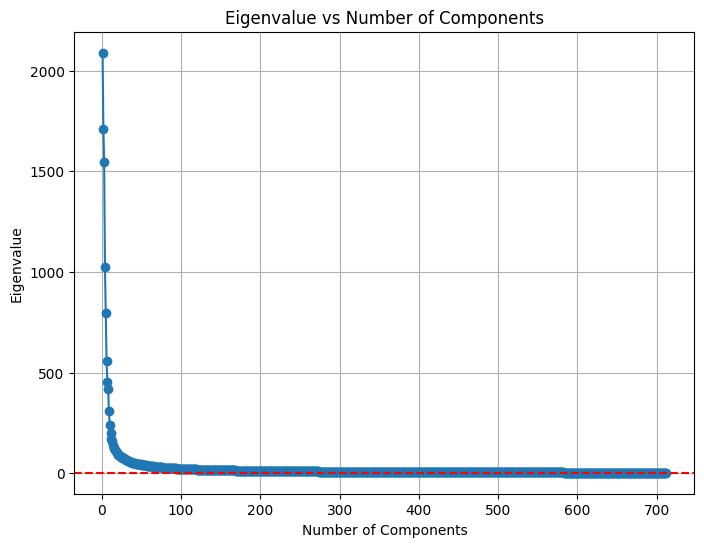

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue vs Number of Components')
plt.axhline(y=1, color='red', linestyle='--', label='Eigenvalue = 1')
plt.grid(True)
plt.show()

##### PCA with 0.99 variance explainability:

In [ ]:
class_df = pd.DataFrame(label)

class_df= class_df['Class']
class_df
class_df.columns = ["class"]

<Axes: xlabel='0', ylabel='1'>

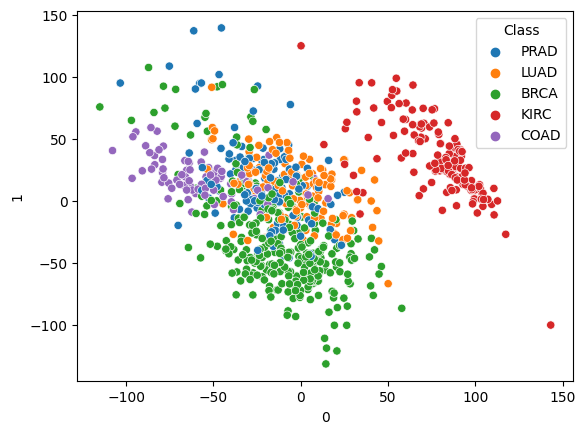

In [ ]:
df_pca = pd.concat([pd.DataFrame(X_pca_99), class_df], axis =1)
# df_pca_99['cancer_type']=df_pca['Class']
# Present the data on the 5 clusters using seaborn maps
sns.scatterplot(x=0,y=1, hue = "Class",data=df_pca)

#### 2. Dimension Reduction using t-SNE

In [ ]:
# import t-SNE from sklearn
m = TSNE(learning_rate=50)
x_train_scaled = scaler.fit_transform(data)
tnse_features = m.fit_transform(x_train_scaled)
tnse_features[1:4,:]

array([[-15.2717495,  -6.736389 ],
       [ -8.475649 ,  28.243744 ],
       [ -6.6640067,  24.606213 ]], dtype=float32)

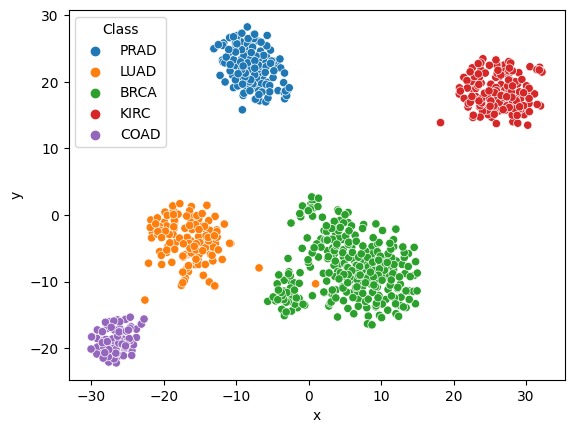

In [ ]:

# Create a DataFrame if x_train_scaled is not already a DataFrame
x_train= pd.DataFrame(x_train_scaled)

# Add new columns for t-SNE features
x_train['x'] = tnse_features[:, 0]
x_train['y'] = tnse_features[:, 1]

x_train = pd.concat([x_train, class_df], axis= 1)
# Create a scatterplot
sns.scatterplot(x='x', y='y',hue = 'Class', data=x_train)
plt.show()

#### 3.Dimensionality reduction using LDA

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit(x_train_scaled, class_df).transform(x_train_scaled)
lda.explained_variance_ratio_


array([0.36219022, 0.30156109])

Text(0.5, 1.0, 'Scatter plot t-SNE')

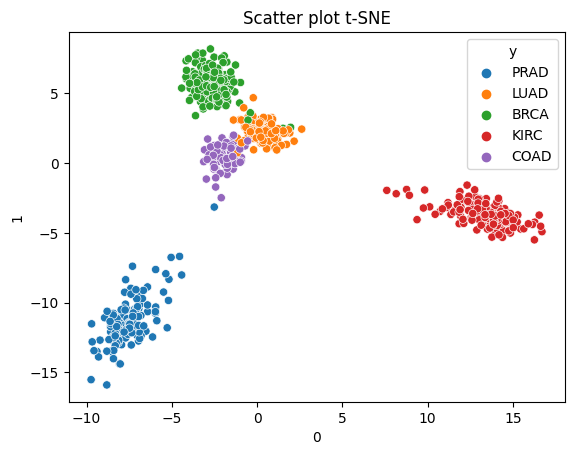

In [ ]:
X_lda = pd.DataFrame(data=X_lda)
X_lda['y']=class_df
# X_lda
sns.scatterplot(x=0,y=1,hue = 'y', data=X_lda)
plt.title("Scatter plot t-SNE")

Clustering Genes and Samples

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.
First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

In [ ]:
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_99)

clusters.labels_



array([4, 0, 4, 4, 1, 4, 2, 4, 1, 4, 1, 2, 4, 0, 1, 1, 0, 2, 2, 4, 1, 2,
       0, 1, 2, 0, 3, 1, 0, 1, 1, 1, 2, 0, 4, 1, 2, 0, 1, 0, 2, 4, 4, 2,
       2, 1, 4, 3, 1, 0, 1, 0, 1, 4, 3, 0, 1, 3, 2, 1, 0, 0, 1, 0, 4, 3,
       1, 4, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 4, 3, 1, 4, 1, 1, 4, 4, 1, 1,
       2, 0, 4, 4, 1, 0, 1, 4, 3, 1, 4, 1, 1, 2, 1, 2, 0, 2, 0, 3, 0, 0,
       4, 1, 0, 4, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 4, 4, 4, 1, 2, 1, 3, 0,
       3, 1, 1, 2, 0, 1, 2, 3, 1, 4, 1, 2, 0, 3, 4, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 4, 4, 0, 4, 0, 2, 1, 4, 0, 3, 2, 0, 1, 2, 0, 1, 0, 1, 0,
       1, 4, 1, 2, 3, 2, 1, 4, 4, 4, 0, 0, 1, 0, 0, 2, 0, 4, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 2, 2, 4, 0, 4, 0, 0, 0, 1, 4, 1, 4, 1, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 1, 2, 4, 1, 0, 0, 4, 3, 0, 2, 4, 2, 3, 0, 2, 2, 0,
       4, 0, 0, 0, 2, 1, 0, 3, 1, 4, 0, 1, 4, 2, 4, 4, 4, 1, 3, 3, 0, 3,
       3, 4, 0, 1, 1, 2, 2, 1, 3, 4, 2, 4, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 4, 1,

In [ ]:
# pca_with_2_data_frame = pd.DataFrame(data=X_pca_with_2,columns=['pca1','pca2'])
# pca_with_2_data_frame.head()

In [ ]:
# pca_with_2_data_frame['Cls_label'] = clusters.labels_
# pca_with_2_data_frame['given_cancer_type'] = label.Class.values
# pca_with_2_data_frame

### K-means Clustering:

#### 1. on PCA with 0.99 variance explainibility:

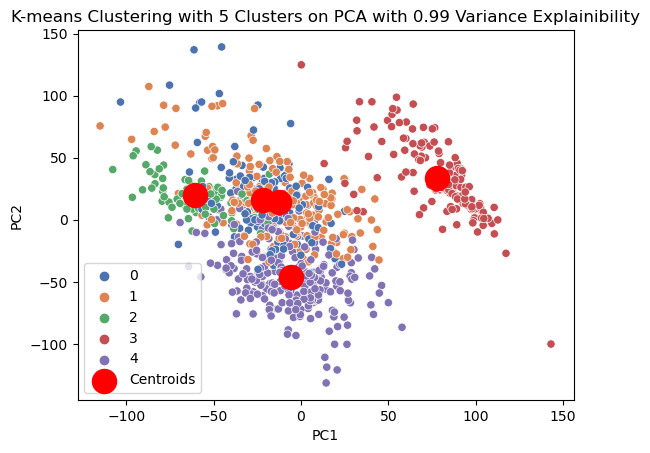

In [ ]:

# Specify the number of clusters (e.g., 5 clusters)
n_clusters = 5

# Create a K-means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model and get cluster assignments
pred_y = kmeans.fit_predict(X_pca_99)

# Create a DataFrame for plotting
df = pd.DataFrame({'PC1': X_pca_99[:, 0], 'PC2': X_pca_99[:, 1], 'Cluster': pred_y})

# Create a scatterplot of PCA components
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette=sns.color_palette('deep'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'K-means Clustering with {n_clusters} Clusters on PCA with 0.99 Variance Explainibility')
plt.legend()
plt.show()

#### 2. On t-SNE:

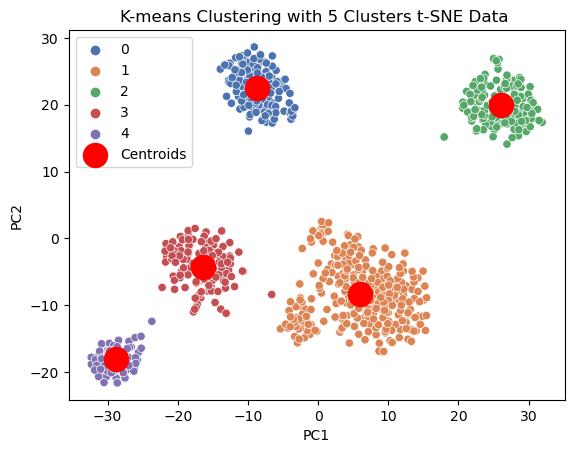

In [ ]:

# Specify the number of clusters (e.g., 5 clusters)
n_clusters = 5

# Create a K-means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model and get cluster assignments
pred_y = kmeans.fit_predict(tnse_features)

# Create a DataFrame for plotting
df = pd.DataFrame({'PC1': tnse_features[:, 0], 'PC2': tnse_features[:, 1], 'Cluster': pred_y})

# Create a scatterplot of PCA components
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette=sns.color_palette('deep'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'K-means Clustering with {n_clusters} Clusters t-SNE Data ')
plt.legend()
plt.show()

####  3. K-means Clustering on LDA:

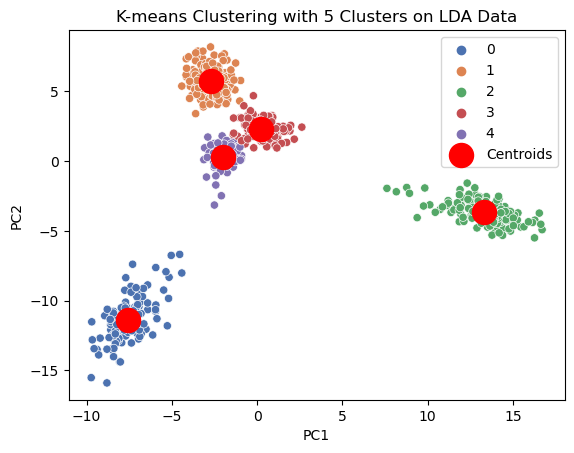

In [ ]:

# Specify the number of clusters (e.g., 5 clusters)
n_clusters = 5

# Create a K-means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model and get cluster assignments
pred_y = kmeans.fit_predict(X_lda.drop('y', axis = 1))

# Create a DataFrame for plotting
df = pd.DataFrame({'PC1': X_lda[0], 'PC2': X_lda[1], 'Cluster': pred_y})

# Create a scatterplot of PCA components
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette=sns.color_palette('deep'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'K-means Clustering with {n_clusters} Clusters on LDA Data')
plt.legend()
plt.show()

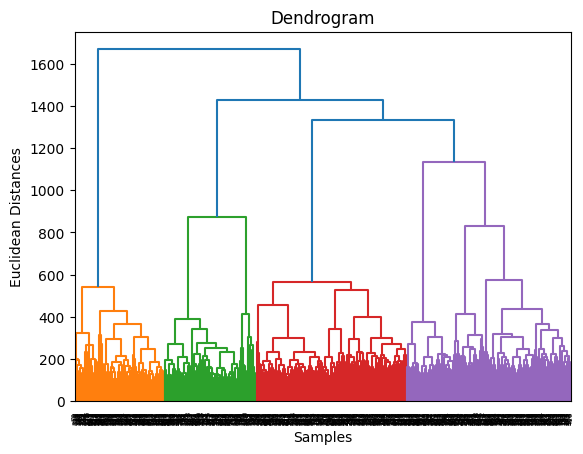

In [ ]:


# Calculate linkage matrix for hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X_pca_99, method='ward'))

plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.title('Dendrogram')
plt.show()


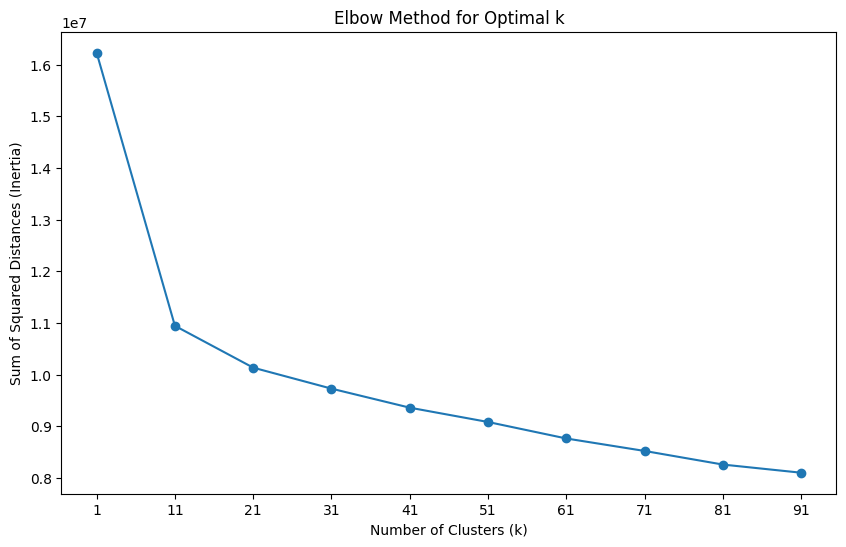

In [ ]:

# Calculate the sum of squared distances for different values of k
inertia = []
for k in range(1, 100, 10):  # Trying k from 1 to 10 (you can adjust this range)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Corrected figsize here
plt.plot(range(1, 100, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 100, 10))
plt.show()

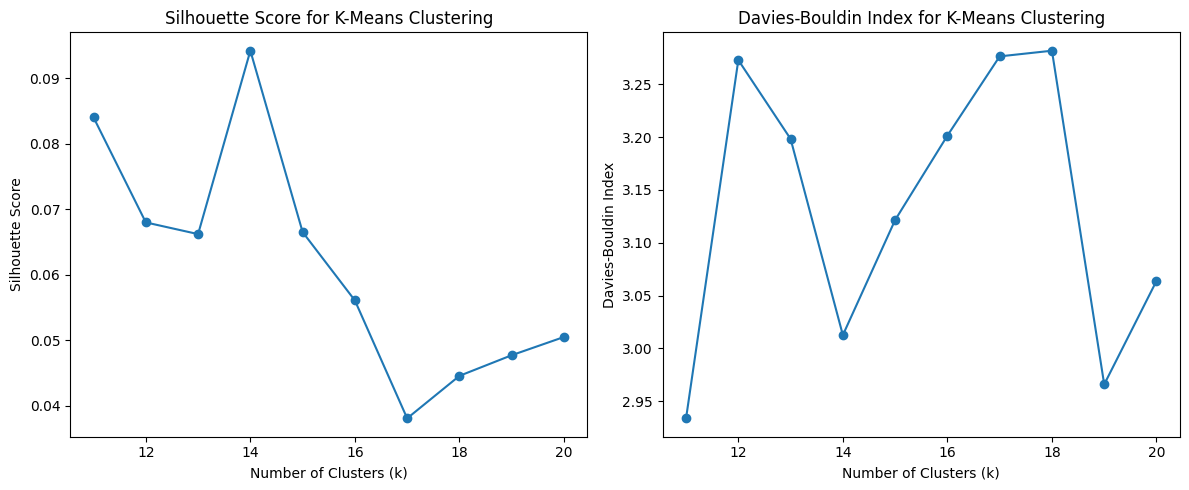

In [ ]:


# Load your data (replace this with your actual data)
# X should be a matrix where rows represent samples and columns represent features
X = x_train_scaled

# Calculate silhouette scores and Davies-Bouldin index for different values of k
silhouette_scores = []
davies_bouldin_scores = []

k_range = range(11,21)  # Trying k from 2 to 10 (you can adjust this range)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)

    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

# Plotting performance metrics
plt.figure(figsize=(12, 5))

# Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')

# Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for K-Means Clustering')

plt.tight_layout()
plt.show()


## 3. Factor Analysis:

##### 1.BARTLETT’S TEST OF SPHERICITY


Bartlett’s test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. The identical matrix consists of all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables.

We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables. If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

In [ ]:

chi2, p = calculate_bartlett_sphericity(x_train_scaled)
print("Chi squared value : ",chi2)
print("p value : ",p)


Chi squared value :  nan
p value :  nan


As p-value is exactly 1, which is red signal for factoral analysis, still, we will see the result of the factor analysis, as this is just an study of the these techniques!!

##### 2. KAISER-MEYER-OLKIN (KMO) TEST:

KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. We can also say it as a measure of how suited our data is for factor analysis

In [ ]:
# from factor_analyzer.factor_analyzer import

kmo_var, kmo_model = calculate_kmo(x_train_scaled)
print(kmo_model)#OUTPUT:


Just pass the dataframe which contains information about the dataset to the calculate_kmo function. The function will return the proportion of variance for each variable which is stored in the variable ‘kmo_vars’ and the proportion of variance for the whole of our data is stored in ‘kmo_model’. we can see that our data has an overall proportion of variance as 0.49 . It shows that our data has less correlation and dimensionality reduction techniques such as the factor analysis we will try to apply to see the results and why we can't applied!!

## DETERMINING THE NUMBER OF FACTORS
The number of factors in our dataset is equal to the number of variables in our dataset. All the factors are not gonna provide a significant amount of useful information about the common variance among the variables. So we have to decide the number of factors. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigenvalues.

Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1.

But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.

### 3.1 Factors Estimation: Using PCA:

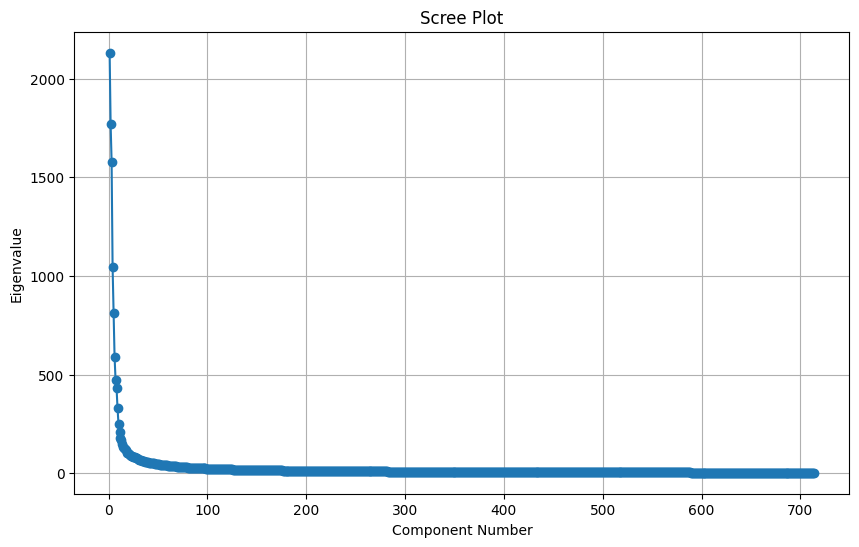

In [ ]:
# Calculate the covariance matrix from the principal components
covariance_matrix = np.cov(X_pca_99, rowvar=False)

# Calculate the eigenvalues of the covariance matrix
eigenvalues, _ = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues_sorted, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

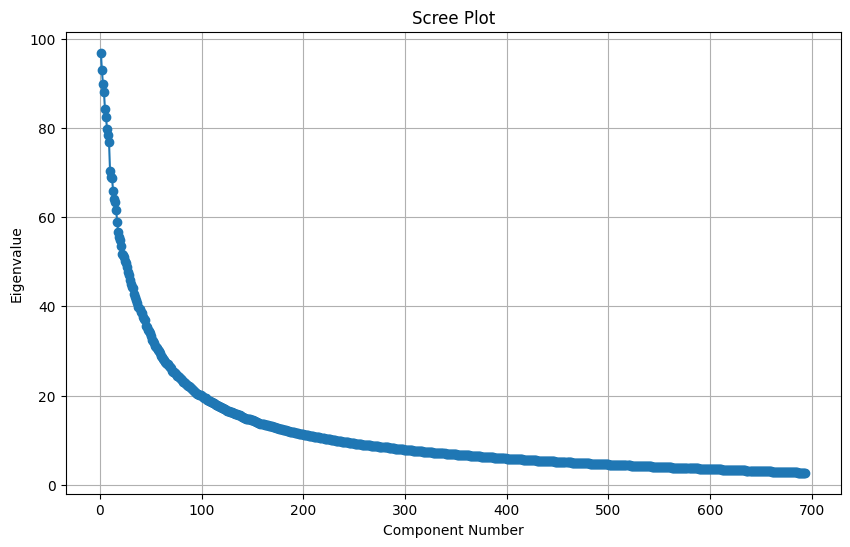

In [ ]:
ev_under_100 = [ev for ev in eigenvalues_sorted if ev <= 100]

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev_under_100) + 1), ev_under_100, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

The eigenvalues function will return the original eigenvalues and the common factor eigenvalues. Now, we are going to consider only the original eigenvalues. From the graph, we can see that the eigenvalues drop below from the 20th factor. So, the optimal number of factors is 20.

##### LOADINGS

In [ ]:
fa = FactorAnalyzer(n_factors=20,rotation='varimax', method = "principle")
fa.fit(X_pca_99)
loadings = pd.DataFrame(fa.loadings_)

NameError: ignored

In [ ]:
loadings = pd.DataFrame(fa.loadings_)
loadings.head(5)

In [ ]:
# sort(loadings)
# sns.heatmap(loadings, cmap = 'viridis')

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

In [ ]:
variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 20 factors together are able to explain 0% of the total variance.

##### COMMUNALITIES
Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.

In [ ]:
print(pd.DataFrame(fa.get_communalities(),columns=['Communalities']))

### Canonical Correlation Analysis:

In [ ]:
num_columns = x_train_scaled.shape[1]
midpoint = num_columns // 2
X1 = x_train_scaled[:, :midpoint]
X2 = x_train_scaled[:, midpoint:]

n_comp = 2  # Choose the number of canonical variate pairs
cca = CCA(scale=False, n_components=n_comp)  # Define CCA
cca.fit(X1, X2)  # Fit our scaled x_train_scal
X1_c, X2_c = cca.transform(X1, X2)  # Transform our x_train_scaledsets to obtain canonical variates


Now let’s check if there is any dependency between our canonical variates. We do it by correlating canonical variate pairs.

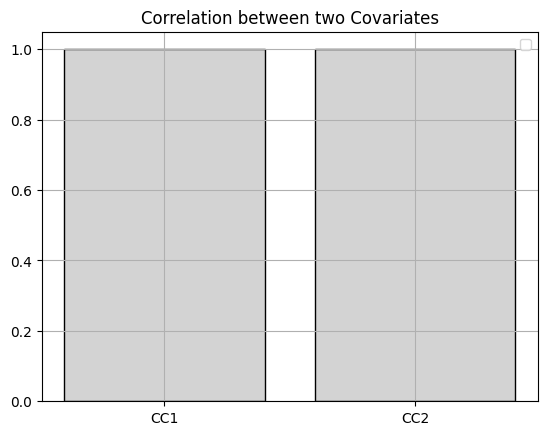

In [ ]:
comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')
plt.grid()
plt.legend()
plt.title("Correlation between two Covariates")
plt.show()

We can see that both cananocal variate highly correlated correlation is equal to 1.

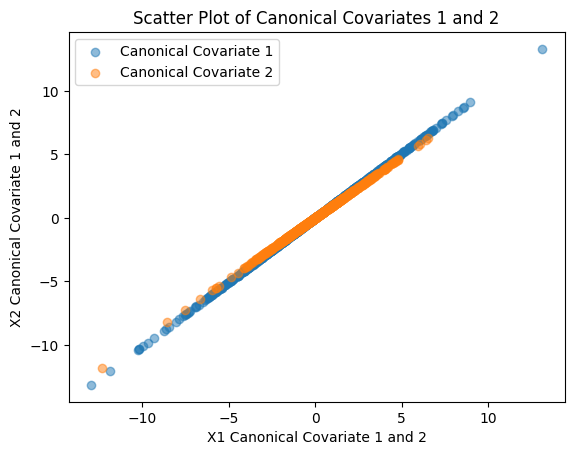

In [ ]:
# Iterate through pairs of canonical covariates
for i in range(n_comp - 1):
    for j in range(i + 1, n_comp):
        plt.figure()
        plt.scatter(X1_c[:, i], X2_c[:, i], label=f'Canonical Covariate {i+1}', alpha=0.5)
        plt.scatter(X1_c[:, j], X2_c[:, j], label=f'Canonical Covariate {j+1}', alpha=0.5)
        plt.xlabel(f'X1 Canonical Covariate {i+1} and {j+1}')
        plt.ylabel(f'X2 Canonical Covariate {i+1} and {j+1}')
        plt.legend()
        plt.title(f'Scatter Plot of Canonical Covariates {i+1} and {j+1}')

plt.show()


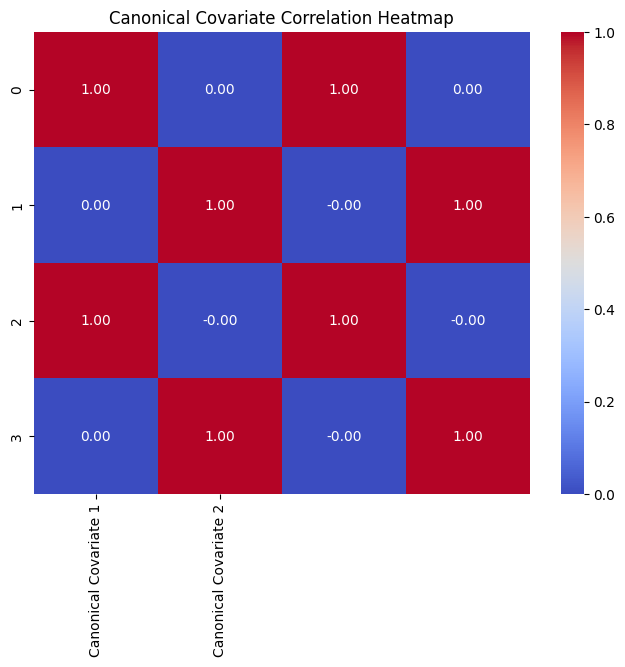

In [ ]:

# Calculate the correlation matrix
corr_matrix = np.corrcoef(X1_c, y=X2_c, rowvar=False)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Canonical Covariate 1', 'Canonical Covariate 2'])
plt.title("Canonical Covariate Correlation Heatmap")
plt.show()
